## Grundlagen des maschinellen Lernens (2023/24)

**Abgabe von Vittorio Ciccarelli, Hanxin Xia und Anna Stein** 

## **Aufgabenblatt 2**

**Abgabetermin: Mittwoch, 6. Dezember 2023**

Bitte bearbeiten Sie die Aufgaben im vorliegenden Jupyter-Notebook. Laden Sie das resultierende ipynb-File in ILIAS hoch.

## Aufgabe 1

Gegeben sei die folgendermaßen erzeugte Menge von Datenpunkte:

In [1]:
import numpy as np

np.random.seed(42)
N = 50
x = np.random.rand(N, 1)
y = np.sin(10 * x) + 0.1 * np.random.randn(N, 1)

Die durch den folgende Code erzeugte Graphik veranschaulicht die Anordnung der Datenpunkte.

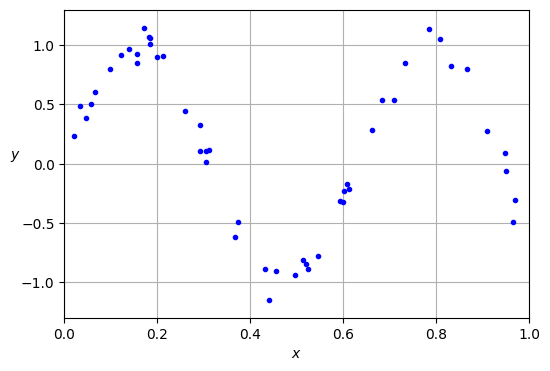

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(x, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 1, -1.3, 1.3])
plt.grid()
plt.show()

Teilen Sie die Datenpunkte in eine Trainings- und eine Validierungsmenge auf, indem Sie jeden zweiten Datenpunkt der Validierungsmenge zuschlagen.

Modellieren Sie die Trainingsdaten mittels linearer Regression unter der Merkmalstransformation $\phi=(\phi_1,\dots,\phi_r)$, wobei die Funktion $\phi_i$, eine radiale Basisfunktion mit Zentrum $m_i$ und Weitenparameter $b$, folgendermaßen definiert ist:

$$
\displaystyle
\phi_i(x)~=~\mathrm{exp}\bigl(-\biggl(\frac{x-m_i}{b}\biggr)^2\bigr)
$$

Dabei sei $r=15$ und die $m_i$'s seien in gleichen Abständen über das Intervall $[0,1]$ verteilt, mit $m_1=0$ und $m_{15}=1$.

Wenden Sie lineare Regression mit Ridge-Regularisierung auf die transformierten Daten an.
Nutzen Sie dazu das `Ridge`-Modell aus Scikit-Learn mit der Regularisierungsstärke $0.01$ (Parameter `alpha`) und dem Solver `cholesky`.

Ermitteln Sie denjenigen Wert für $b$, für den das berechnete Modell den geringsten Fehler auf den Validierungsdaten aufweist. 
Testen Sie dazu die ersten hundert Vielfachen von $0.01$ als mögliche Werte für $b$.
Verwenden Sie die Funktion `mean_squared_error` aus Scikit-Learn zur Berechnung des Fehlers.
Erzeugen Sie einen Plot des Fehlerwerts in Abhängigkeit von $b$.

Plotten Sie für den ermittelten besten Wert von $b$ die durch das zugehörige Modell generierte Prädiktionskurve über die graphische Darstellung der Originaldatenpunkte.

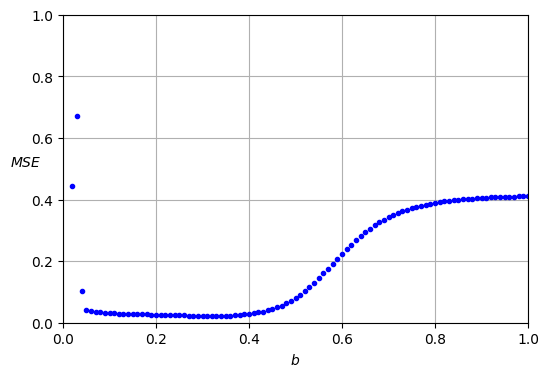

In [3]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

x_train, x_dev, y_train, y_dev = x[0:50:2], x[1:50:2], y[0:50:2], y[1:50:2]


def transform(X, b):
    transformed_X = []
    r = 15
    centers = np.linspace(0, 1, r)
    for value in X:
        for m in centers:
            new_value = np.exp(-(((value - m) / b) ** 2))
            transformed_X.append(new_value)
    transformed_X = np.array(transformed_X)
    transformed_X = transformed_X.reshape(len(X), r)
    return transformed_X


mses = {}

for b in np.linspace(0.01, 1, 100):
    train_transformed = transform(x_train, b)
    ridge_reg = Ridge(alpha=0.01, solver="cholesky")
    ridge_reg.fit(train_transformed, y_train)
    dev_transformed = transform(x_dev, b)
    mse = mean_squared_error(y_dev, ridge_reg.predict(dev_transformed))
    mses[b] = mse

# plot mses against b
plt.figure(figsize=(6, 4))
plt.plot(list(mses.keys()), list(mses.values()), "b.")
plt.xlabel("$b$")
plt.ylabel("$MSE$", rotation=0)
plt.axis([0, 1, 0, 1])
plt.grid()
plt.show()

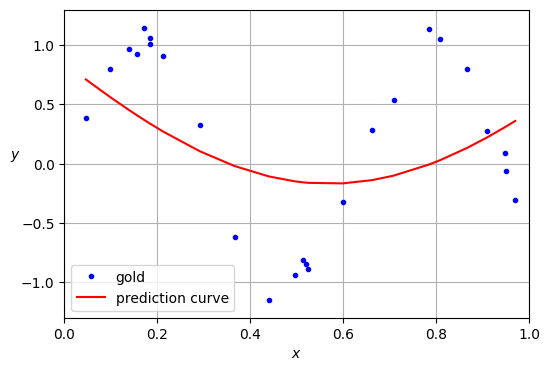

In [4]:
# sorting so that the prediction points can be connected as a 
sorted_indices = np.argsort(np.concatenate(x_dev))
sorted_x_dev = np.array(x_dev)[sorted_indices]
sorted_y_val_pred = np.array(ridge_reg.predict(dev_transformed))[sorted_indices]

# compare predictions with gold labels when the best b-value is used for transformation
plt.figure(figsize=(6, 4))
plt.plot(x_dev, y_dev, "b.", label="gold")
plt.plot(sorted_x_dev, sorted_y_val_pred, "r", linestyle='-', label='prediction curve')
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 1, -1.3, 1.3])
plt.legend()
plt.grid()
plt.show()

## Aufgabe 2

Ziel dieser Aufgabe ist die Rekonstruktion des auf den Vorlesungsfolien im Abschnitt ‘Logistic regression/Feature transformations’ anhand der Abbildung 17.12 aus Barber (2012) illustrierten binären Klassifikationsbeispiels.
Verwenden Sie dazu die folgendermaßen erzeugten Daten.

In [178]:
import numpy as np

count = 25
cov = [[5, 0], [0, 5]]
mean = [[4, 5], [-5, 4], [-4, -4], [4, -5]]

np.random.seed(42)
x = [np.random.multivariate_normal(m, cov, count) for m in mean]
X = np.concatenate(x)

classes = [0, 1, 0, 1]
cl = [np.full((count), c) for c in classes]
y = np.concatenate(cl)

Die nachfolgend erzeugte Graphik illustriert die Anordnung der Datenpunkte sowie ihre Klassenzugehörigkeit.

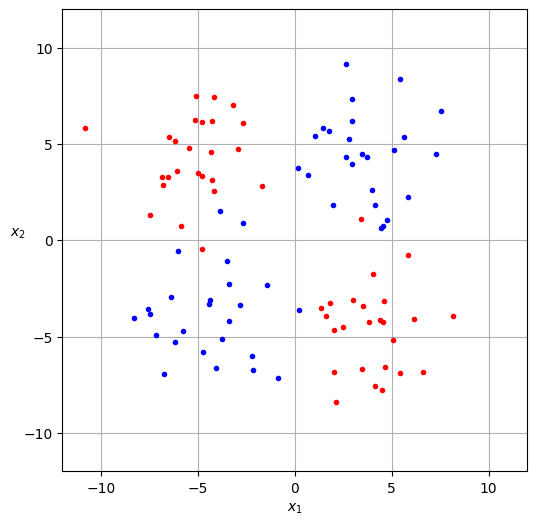

In [120]:
import matplotlib.pyplot as plt

plotsect = 12
plt.figure(figsize=(6, 6))
dotcolors = "br"
for i, xi in enumerate(x):
    plt.plot(xi[:, 0], xi[:, 1], dotcolors[classes[i]] + ".")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.axis([-plotsect, plotsect, -plotsect, plotsect])
plt.grid()
plt.show()

Konstruieren Sie einen Klassifikator für die Daten unter Verwendung des Modells `LogisticRegression` aus Scikit-learn.
Transformieren Sie vorher die Daten in geeigneter Weise.

Stellen Sie die “Höhenlinien” der Klassenzugehörigkeitswahrscheinlichkeiten graphisch im Plott der Datenpunkte dar.
Sie können sich dabei an dem `matplotlib`-Code aus dem Notebook zu Kaptitel 4 von Gérons Buch, Abschnitt ‘Softmax Regression’, orientieren, der zur Erzeugung der Abbildung 4-25 im Buch dient. (Die resultierende Graphik sollte eine gewisse Ähnlichkeit mit der oben erwähnten Abbildung aus Barbers Buch aufweisen.)

Wir konnten leider nur den output von der Regression bekommen, ihn aber nicht mit den contour lines/areas plotten.

Wir haben versucht, den code aus dem notebook so zu ändern, dass wir unsere Daten plotten können. Allerdings haben wir nicht herrausfinden können, wie wir die `np.meshgrid` Funktion benutzen sollen, um die richtigen Dimensionen für x0 und x1 zu bekommen, so dass diese auch mit den Dimensionen des `Z` Arguments der contour Funktion übereinstimmen. 

In [179]:
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x_train, x_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3, interaction_only=True)
X_trans_train = poly.fit_transform(x_train)

custom_cmap = ListedColormap(["#fafab0", "#9898ff"])

log_reg = LogisticRegression(solver="lbfgs")
reg_fit = log_reg.fit(X_trans_train, y_train)

x0, x1 = np.meshgrid(
    X[:, 0].reshape(-1, 1),
    X[:, 1].reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = reg_fit.predict_proba(poly.fit_transform(x_dev))
y_predict = reg_fit.predict(poly.fit_transform(x_dev))

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "g^", label="A")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="B")

plt.contourf(x0, x1, zz, cmap=custom_cmap)  # plot contour area
contour = plt.contour(x0, x1, y_proba, cmap="hot")  # plot contour lines
plt.clabel(contour, inline=1)  # label contour plot

plt.xlabel("xlabel")
plt.ylabel("ylabel")
# plt.legend(loc="center left")
# äplt.axis([0.5, 7, 0, 3.5])
plt.grid()
# save_fig("softmax_regression_contour_plot")
plt.show()

ValueError: cannot reshape array of size 20 into shape (100,100)